In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;sns.set()
from sklearn import cluster
from tqdm import *
from collections import OrderedDict
import pdb

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Null value Detection

In [ ]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)
data.fillna(0, inplace = True)

### Unwanted column detection

In [ ]:
team = data.groupby('Club',as_index=False)['Overall','Potential','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'].sum()
#team.sort_values(by='Overall', ascending=False, inplace=True)
team1 = team.sort_values(by='Club', ascending=False, inplace=False)
print (team)

                      Club  Overall  Potential     Crossing    Finishing  \
0      SSV Jahn Regensburg     1902       2010  1368.000000  1261.000000   
1    1. FC Heidenheim 1846     1841       2014  1385.000000  1274.000000   
2     1. FC Kaiserslautern     1648       1817  1250.000000  1082.000000   
3               1. FC Köln     1982       2144  1466.000000  1291.000000   
4          1. FC Magdeburg     1706       1829  1209.000000  1166.000000   
..                     ...      ...        ...          ...          ...   
647     Zagłębie Sosnowiec     1519       1616  1161.000000  1007.000000   
648        Çaykur Rizespor     2007       2150  1512.000000  1390.000000   
649              Örebro SK     1633       1796  1180.000000  1042.000000   
650          Östersunds FK     1398       1515  1080.000000   917.000000   
651          Śląsk Wrocław     1555       1639  1107.734181  1099.550911   

     HeadingAccuracy  ShortPassing      Volleys    Dribbling        Curve  \
0        1

<ipython-input-7-6b105ac6552a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team = data.groupby('Club',as_index=False)['Overall','Potential','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'].sum()


In [ ]:
team.isnull().sum()

Club               0
Overall            0
Potential          0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

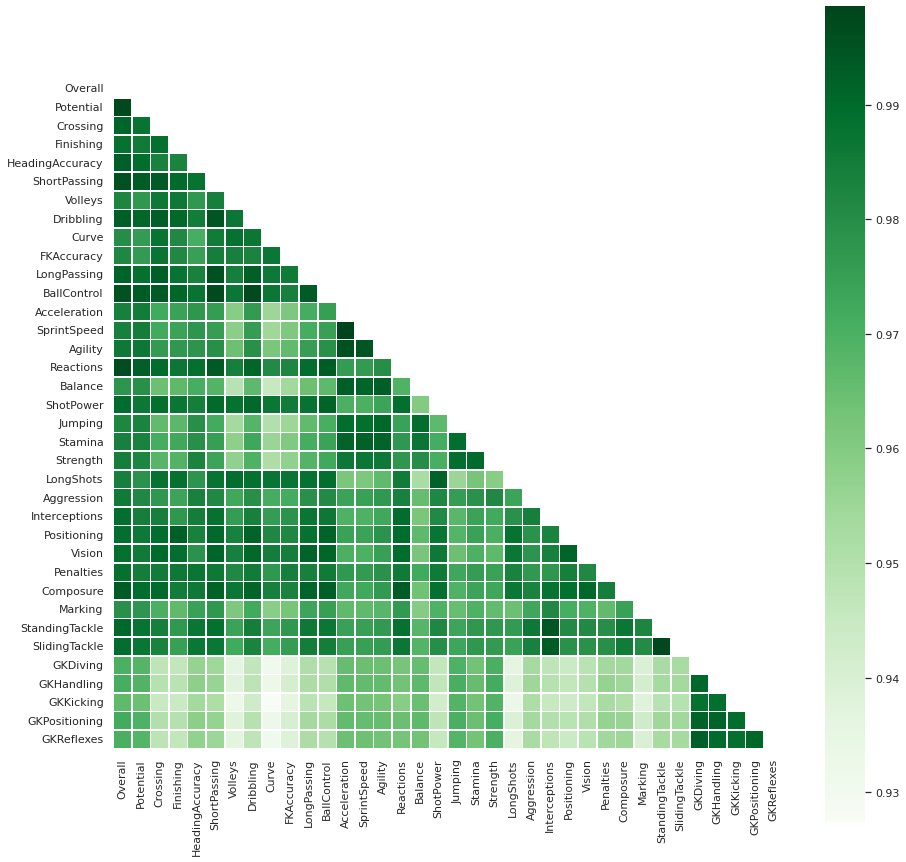

In [ ]:
correlations = team.corr()
hm = np.zeros_like(correlations)
hm[np.triu_indices_from(hm)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(correlations,mask=hm,square=True,linewidths=.8,cmap="Greens")

In [ ]:
# as potential is more corellated to overall, we remove it
#the overall acts as dependant attribute to all other features
team.drop(['Potential'],axis=1,inplace=True)

###Outlier Detection

In [ ]:
def cap_data(team):
    for col in team.columns:
        print("capping the ",col)
        if (((team[col].dtype)=='float64') | ((team[col].dtype)=='int64')):
            percentiles = team[col].quantile([0.01,0.99]).values
            team[col][team[col] <= percentiles[0]] = percentiles[0]
            team[col][team[col] >= percentiles[1]] = percentiles[1]
        else:
            team[col]=team[col]
    return team

final_team=cap_data(team)

capping the  Club
capping the  Overall
capping the  Crossing
capping the  Finishing
capping the  HeadingAccuracy
capping the  ShortPassing
capping the  Volleys
capping the  Dribbling
capping the  Curve
capping the  FKAccuracy
capping the  LongPassing
capping the  BallControl
capping the  Acceleration
capping the  SprintSpeed
capping the  Agility
capping the  Reactions
capping the  Balance
capping the  ShotPower
capping the  Jumping
capping the  Stamina
capping the  Strength
capping the  LongShots
capping the  Aggression
capping the  Interceptions
capping the  Positioning
capping the  Vision
capping the  Penalties
capping the  Composure
capping the  Marking
capping the  StandingTackle
capping the  SlidingTackle
capping the  GKDiving
capping the  GKHandling
capping the  GKKicking
capping the  GKPositioning
capping the  GKReflexes


<ipython-input-11-2951bf139e7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[col][team[col] <= percentiles[0]] = percentiles[0]
<ipython-input-11-2951bf139e7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[col][team[col] >= percentiles[1]] = percentiles[1]
<ipython-input-11-2951bf139e7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team[col][team[col] <= percentiles[0]] = percentiles[0]


### Encoding

In [ ]:
Result=[]
temp = team.Overall.values
for i in range(len(temp)):
    if temp[i] >= 1965.25:
        temp[i]=2
    elif temp[i]<1965.25 and temp[i]>=1687.5:
        temp[i]=1
    else:
        temp[i]=0

In [ ]:
team

,Club,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,SSV Jahn Regensburg,1.0,1368.000000,1261.000000,1605.000000,1679.000000,1211.000000,1527.000000,1258.000000,1091.0,...,1330.0,1635.0,1431.0,1310.00,1246.00,463.0,469.0,427.0,467.0,470.0
1,1. FC Heidenheim 1846,1.0,1385.000000,1274.000000,1397.000000,1625.000000,1210.000000,1518.000000,1311.000000,1219.0,...,1306.0,1575.0,1235.0,1307.00,1241.00,486.0,471.0,418.0,477.0,452.0
2,1. FC Kaiserslautern,0.0,1250.000000,1082.000000,1322.000000,1460.000000,1069.000000,1294.000000,1186.000000,1086.0,...,1194.0,1374.0,1100.0,1150.00,1145.00,416.0,399.0,388.0,395.0,391.0
3,1. FC Köln,2.0,1466.000000,1291.000000,1518.000000,1783.000000,1247.000000,1623.000000,1425.000000,1272.0,...,1413.0,1731.0,1474.0,1471.00,1378.00,521.0,494.0,541.0,500.0,503.0
4,1. FC Magdeburg,1.0,1209.000000,1166.000000,1320.000000,1487.000000,962.000000,1335.000000,1112.000000,987.0,...,1206.0,1371.0,1215.0,1207.00,1167.00,406.0,430.0,408.0,406.0,448.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Zagłębie Sosnowiec,0.0,1161.000000,1007.000000,1152.000000,1357.000000,979.000000,1252.000000,1046.000000,896.0,...,1113.0,1371.0,1219.0,1187.00,1156.00,427.0,391.0,417.0,391.0,413.0
648,Çaykur Rizespor,2.0,1512.000000,1390.000000,1596.000000,1783.000000,1315.000000,1708.000000,1481.000000,1279.0,...,1511.0,1706.0,1382.0,1501.00,1465.00,514.0,544.0,528.0,536.0,527.0
649,Örebro SK,0.0,1180.000000,1042.000000,1192.000000,1382.000000,1028.000000,1341.000000,1217.000000,978.0,...,1128.0,1462.0,1170.0,1082.00,1043.00,422.0,419.0,395.0,434.0,423.0
650,Östersunds FK,0.0,1080.000000,920.510000,1033.750000,1238.000000,918.000000,1207.000000,1092.000000,898.0,...,938.0,1257.0,1035.0,950.14,906.02,365.0,378.0,397.0,357.0,385.0


## K MEANS

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans.fit(team.drop(['Club','Overall'],axis=1))
kmeans.cluster_centers_

array([[1165.25357998, 1077.77116139, 1244.02174863, 1376.12714406,
        1007.96768843, 1294.76736965, 1099.76076866,  995.97652174,
        1229.44293625, 1368.58247786, 1570.34625   , 1571.87793478,
        1534.67076087, 1445.07217391, 1564.02244565, 1294.8373913 ,
        1585.28021739, 1537.46961957, 1602.81054348, 1087.99766304,
        1329.73369565, 1092.38663043, 1170.58538043, 1254.41070652,
        1146.15293478, 1377.25152174, 1103.42695652, 1122.2825    ,
        1076.70184783,  407.1148913 ,  401.88581522,  399.35326087,
         399.34391304,  410.8175    ],
       [1389.06108395, 1270.29582872, 1464.97618809, 1642.95482547,
        1194.47435843, 1550.23648777, 1314.79996543, 1197.5013624 ,
        1474.67016513, 1632.73776194, 1809.10081744, 1812.35694823,
        1779.05449591, 1724.38147139, 1792.4359673 , 1548.01634877,
        1824.00817439, 1768.64850136, 1825.30790191, 1314.61035422,
        1557.07629428, 1300.25340599, 1392.20980926, 1486.09264305,
        1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


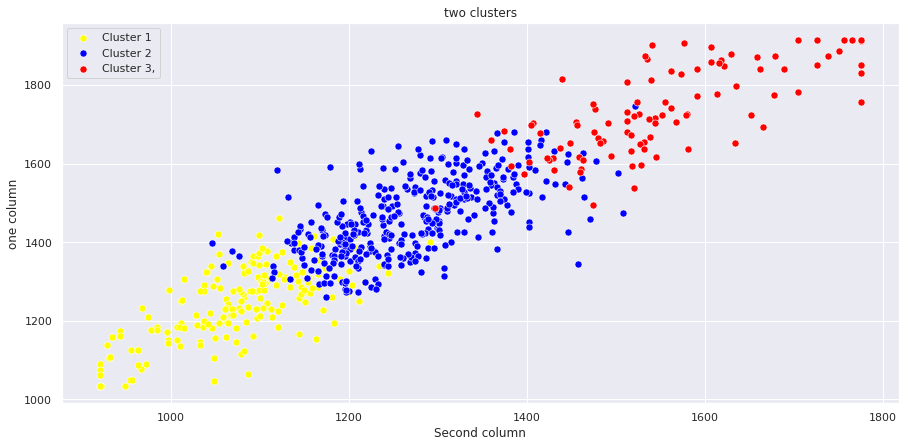

In [ ]:
``
y_kmeans = kmeans.fit_predict(team.drop(['Club','Overall'],axis=1))
X = np.array(team.drop(['Club','Overall'],axis=1))


plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], color = 'red', label = 'Cluster 3,',s=50)

##sns.scatterplot(kmeans.cluster_centers_[1:3, 0], kmeans.cluster_centers_[1:3, 1],kmeans.cluster_centers_[1:3,2], color = 'red', 
                #label = 'Centroids',s=300,marker=',')


plt.title('two clusters')
plt.xlabel('Second column')
plt.ylabel('one column')
plt.legend()
plt.show()

In [ ]:
count=0
temp=team.Overall.values
for i in range(len(y_kmeans)):
  if(temp[i]==y_kmeans[i]):
    pass
  else:
    count+=1
print("accuracy",100-(count*100/len(y_kmeans)))

accuracy 84.50920245398773


## PCA

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# construct a dataframe using pandas
df1=team.drop(['Club','Overall'],axis=1);

# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)


principal=PCA()
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)


(652, 34)


[[ 1.79184014e-01  1.77691912e-01  1.76721708e-01 ...  1.43426491e-01
   1.49665806e-01  1.46534891e-01]
 [-1.04538622e-01 -8.70764532e-02 -6.93322876e-02 ...  4.02937300e-01
   3.82976478e-01  3.92995180e-01]
 [-9.57457143e-02 -3.86602275e-02  3.12482170e-03 ... -1.32779124e-01
  -1.46024141e-01 -1.74444952e-01]
 ...
 [ 6.31008631e-02 -2.00754969e-02 -2.07561810e-02 ... -1.50120959e-04
   1.42237841e-02  1.93829807e-02]
 [ 3.44177633e-02  1.38253733e-02  5.14888849e-02 ... -1.67789976e-03
  -2.81710000e-02 -5.37975775e-03]
 [ 9.06159816e-03  2.31057280e-02  4.47402613e-03 ... -9.57614873e-03
   1.27461673e-02 -1.97192512e-03]]


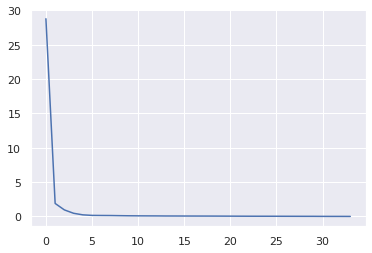

In [ ]:
x = principal.components_
print(x)
plt.plot(principal.explained_variance_)

In [ ]:
fig, ax = plt.subplots()
grouped = team.groupby('Overall')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=x[0], y=x[1],  label=ke)
plt.show()

In [ ]:
new_data=principal.transform(team.drop(['Club','Overall'],axis=1))
new_data

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[ 8045.7241801 , -1158.79535489],
       [ 7879.74905403, -1149.49804268],
       [ 7123.4779884 , -1044.29019395],
       ...,
       [ 7066.71739201,  -865.54649162],
       [ 6206.30408493,  -846.94489268],
       [ 6695.87597488,  -947.43669371]])

TypeError: ignored

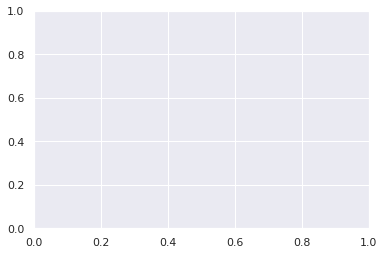

In [ ]:
fig, ax = plt.subplots()
grouped = team.groupby('Overall')
plt.plot(ax=ax, kind='scatter', x=new_data[0], y=new_data[1])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
df1=team.drop(['Club','Overall'],axis=1);

# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
c_space = np.arange(15, 30)
param_grid = {'n_components': c_space}


principal=PCA()
x= GridSearchCV(principal, param_grid)
x.fit(Scaled_data)
k=x.transform(Scaled_data)

# Check the dimensions of data after PCA
print(k.shape)

(652, 28)


## Cluster Visualization

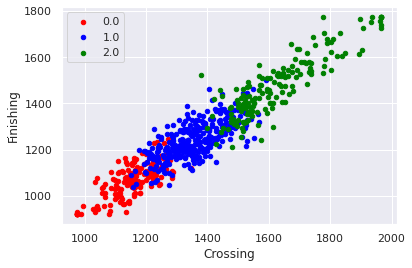

In [ ]:
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = team.groupby('Overall')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Crossing', y='Finishing',  label=key, color=colors[key])
plt.show()

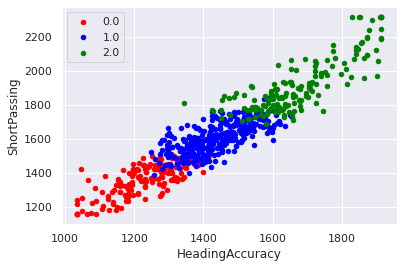

In [ ]:
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = team.groupby('Overall')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='HeadingAccuracy', y='ShortPassing',  label=key, color=colors[key])
plt.show()

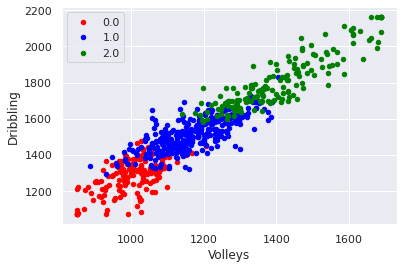

In [ ]:
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = team.groupby('Overall')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Volleys', y='Dribbling',  label=key, color=colors[key])
plt.show()

## Hyper Tuning

In [ ]:
input = team[['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]

In [ ]:
x=input.values
y=team.Overall.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Use "for loop" to get accuracies for your set
activation = 'identity'
print(activation)

for i in [10, 50, 100, 300]:
  hidden_layer_size = i
  clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation=activation, random_state=1)
  clf.fit(X_train, y_train)
  print(hidden_layer_size,"score:")
  print(clf.score(X_test, y_test))

identity
10 score:
0.25462962962962965
50 score:
0.4537037037037037
100 score:
0.4722222222222222
300 score:
0.5092592592592593


In [ ]:
activation = 'logistic'
print(activation)

for i in [10, 50, 100, 300]:
  hidden_layer_size = i
  clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation=activation, random_state=1)
  clf.fit(X_train, y_train)
  print(hidden_layer_size,"score:")
  print(clf.score(X_test, y_test))

logistic
10 score:
0.44907407407407407
50 score:
0.44907407407407407
100 score:
0.44907407407407407
300 score:
0.44907407407407407


In [ ]:
activation = 'tanh'
print(activation)

for i in [10, 50, 100, 300]:
  hidden_layer_size = i
  clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation=activation, random_state=1)
  clf.fit(X_train, y_train)
  print(hidden_layer_size,"score:")
  print(clf.score(X_test, y_test))

tanh
10 score:
0.44907407407407407
50 score:
0.44907407407407407
100 score:
0.44907407407407407
300 score:
0.44907407407407407


In [ ]:
activation = 'relu'
print(activation)

for i in [10, 50, 100, 300]:
  hidden_layer_size = i
  clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation=activation, random_state=1)
  clf.fit(X_train, y_train)
  print(hidden_layer_size,"score:")
  print(clf.score(X_test, y_test))

relu
10 score:
0.25925925925925924
50 score:
0.35648148148148145
100 score:
0.5092592592592593
300 score:
0.38425925925925924


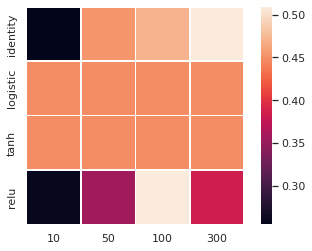

In [ ]:
import numpy as np
import seaborn as sns

# Replace the dummy values below with yours. 0 for the sets that you didn't run
accuracies = [
              [0.25462962962962965,0.4537037037037037,0.4722222222222222,0.5092592592592593],
              [0.44907407407407407,0.44907407407407407,0.44907407407407407,0.44907407407407407],
              [0.44907407407407407,0.44907407407407407,0.44907407407407407,0.44907407407407407],
              [0.25925925925925924,0.35648148148148145,0.5092592592592593,0.38425925925925924]
             ]

# ignore - plotting code
xticklabels = [10, 50, 100, 300]
y_ticklabels = ["identity", "logistic","tanh","relu"]
accuracies = np.array(accuracies)
ax = sns.heatmap(accuracies, linewidths=.5, square=True, xticklabels=xticklabels, yticklabels=y_ticklabels)

we find that tanh activation model with 100 hidden layers shows best accuracy than other results of models

## Neural Networks



1. Import the libraries. For example: import numpy as np
2. Define/create input data. For example, use numpy to create a dataset and an array of data values.
3. Add weights and bias (if applicable) to input features. These are learnable parameters, meaning that they can be adjusted during training.
Weights = input parameters that influences output
Bias = an extra threshold value added to the output
4. Train the network against known, good data in order to find the correct values for the weights and biases.
5. Test the Network against a set of test data to see how it performs. 
6. Fit the model with hyperparameters (parameters whose values are used to control the learning process), calculate accuracy, and make a prediction.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
model = Sequential()
model.add(Dense(68, activation='tanh', input_dim=34))
model.add(Dense(100, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=5, batch_size=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/5
59/59 [==============================] - 1s 2ms/step - loss: -0.7151 - accuracy: 0.5307
Epoch 2/5
59/59 [==============================] - 0s 2ms/step - loss: -1.6847 - accuracy: 0.6809
Epoch 3/5
59/59 [==============================] - 0s 2ms/step - loss: -2.1839 - accuracy: 0.6997
Epoch 4/5
59/59 [==============================] - 0s 2ms/step - loss: -2.6247 - accuracy: 0.7099
Epoch 5/5
3/3 [==============================] - 0s 4ms/step - loss: -2.7954 - accuracy: 0.7424


In [ ]:
model.summary()

Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_332 (Dense)           (None, 68)                2380      
                                                                 
 dense_333 (Dense)           (None, 100)               6900      
                                                                 
 dense_334 (Dense)           (None, 25)                2525      
                                                                 
 dense_335 (Dense)           (None, 1)                 26        
                                                                 
Total params: 11,831
Trainable params: 11,831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

3/3 [==============================] - 0s 3ms/step


In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
10/10 [==============================] - 0s 30ms/step - loss: -3.2173 - accuracy: 0.7133 - val_loss: -2.9005 - val_accuracy: 0.7424
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: -3.2974 - accuracy: 0.7201 - val_loss: -2.9560 - val_accuracy: 0.7424
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: -3.3784 - accuracy: 0.7270 - val_loss: -2.9943 - val_accuracy: 0.7424
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: -3.4376 - accuracy: 0.7270 - val_loss: -3.0642 - val_accuracy: 0.7424
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: -3.4863 - accuracy: 0.7201 - val_loss: -3.1297 - val_accuracy: 0.7424
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: -3.5176 - accuracy: 0.7133 - val_loss: -3.1816 - val_accuracy: 0.7424
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: -3.6082 - accuracy: 0.7201 - val_loss: -3.2467 - val_accuracy: 0.7

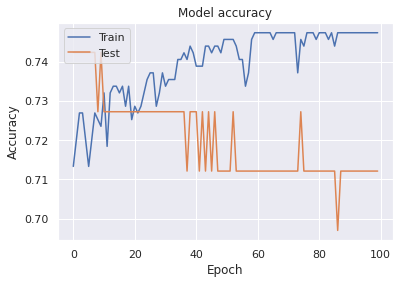

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# temp

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
print(x)

[[1368.         1261.         1605.         ...  427.
   467.          470.        ]
 [1385.         1274.         1397.         ...  418.
   477.          452.        ]
 [1250.         1082.         1322.         ...  388.
   395.          391.        ]
 ...
 [1180.         1042.         1192.         ...  395.
   434.          423.        ]
 [1080.          920.51       1033.75       ...  397.
   357.          385.        ]
 [1107.7341814  1099.55091139 1341.29814417 ...  367.
   394.          403.        ]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=34, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2867
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4727
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4590
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4608
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4642
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4642
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4590
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4590
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4608
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss:

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

3/3 [==============================] - 0s 4ms/step


In [ ]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.5303
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.5303
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.5303
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.5303
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.5303
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - val_loss: 0.0000e+00 - val_accuracy: 0.5303
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4608 - 